In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
print(pd.__version__ , sns.__version__,np.__version__)

1.4.4 0.12.0 1.23.2


In [2]:
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")
print(train_df.shape,test_df.shape)

(1460, 81) (1459, 80)


In [3]:
combine=[train_df,test_df]
for dataset in combine:
    print(dataset.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [5]:
train_df.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
fe_name=list(test_df)
df_train = train_df[fe_name]
df = pd.concat((df_train,test_df))

In [12]:
df = df.drop(["Utilities"], axis=1)

In [13]:
df_num = df.select_dtypes(exclude="object")
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [14]:
li_num = list(df_num.columns)

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

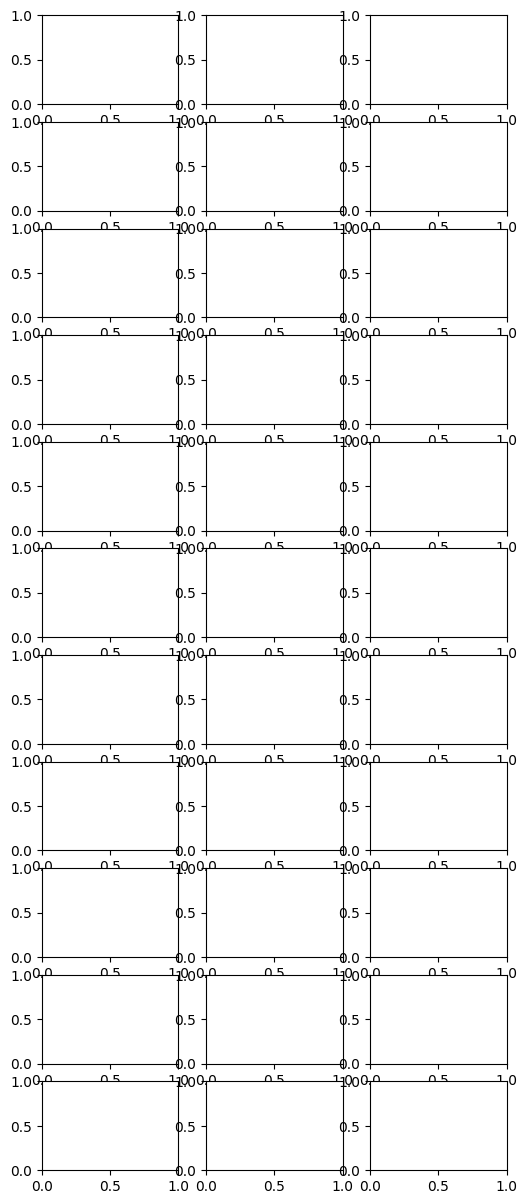

In [18]:
row=11
col=3
target = train_df["SalePrice"]
fig, axs=plt.subplots(row,col,figsize=(col+3,row+4))
for r in range(0,row):
    for c in range(0,col):
        i=r*col+c
        if i<len(li_num):
            sns.regplot(train_df[li_num[i]], target , ax =axs[r][c])

In [4]:
all_data_na = (train_df.isnull().sum()/len(train_df))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})
missing_data

,Missing Data
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


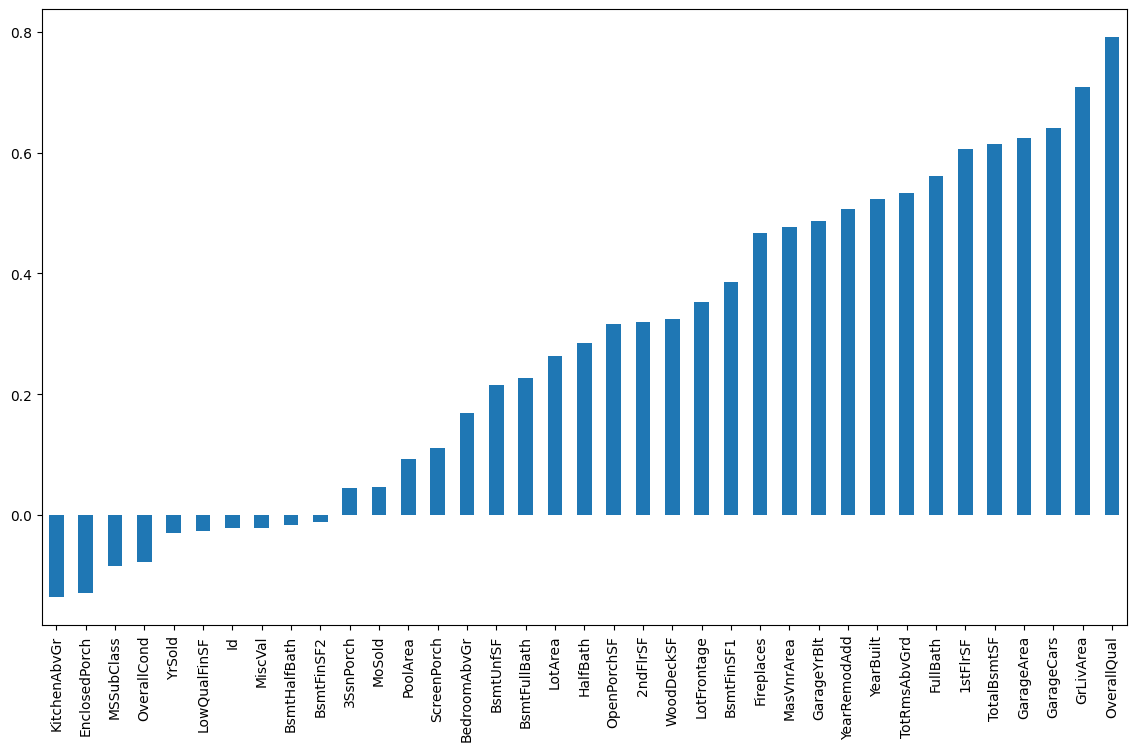

In [273]:
plt.figure(figsize=(14,8))
train_df.corr()['SalePrice'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [274]:
train_df[train_df["SalePrice"]>600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [275]:
sim=train_df.drop("PoolQC",axis=1)

In [276]:
sim=sim.drop("Alley",axis=1)

In [277]:
sim=sim.drop("Fence",axis=1)

In [278]:
sim=sim.drop("MiscFeature",axis=1)

In [279]:
sim=sim.drop("FireplaceQu",axis=1)

In [280]:
combine=[sim,test_df]

In [281]:
title_mapping={"EX":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["GarageQual"]=dataset["GarageQual"].map(title_mapping)
    dataset["GarageQual"]=dataset["GarageQual"].fillna(0)
sim[["GarageQual","SalePrice"]].groupby(["GarageQual"],as_index=False).mean()

,GarageQual,SalePrice
0,0.0,108234.523810
1,1.0,100166.666667
2,2.0,123573.354167
3,3.0,187489.836003
4,4.0,215860.714286


In [282]:
title_mapping={"EX":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["GarageCond"]=dataset["GarageCond"].map(title_mapping)
    dataset["GarageCond"]=dataset["GarageCond"].fillna(0)
sim[["GarageCond","SalePrice"]].groupby(["GarageCond"],as_index=False).mean()

,GarageCond,SalePrice
0,0.0,103815.662651
1,1.0,108500.000000
2,2.0,114654.028571
3,3.0,187885.735294
4,4.0,179930.000000


In [283]:
title_mapping={"BuiltIn":8,"Attchd":7,"Basment":5,"2Types" : 4,"Detchd":3, "CarPort" : 1}
for dataset in combine:
    dataset["GarageType"]=dataset["GarageType"].map(title_mapping)
    dataset["GarageType"]=dataset["GarageType"].fillna(0)
sim[["GarageType","SalePrice"]].groupby(["GarageType"],as_index=False).mean()

,GarageType,SalePrice
0,0.0,103317.283951
1,1.0,109962.111111
2,3.0,134091.162791
3,4.0,151283.333333
4,5.0,160570.684211
5,7.0,202892.656322
6,8.0,254751.738636


In [284]:
title_mapping={"Fin":6,"RFn":5,"Unf":3}
for dataset in combine:
    dataset["GarageFinish"]=dataset["GarageFinish"].map(title_mapping)
    dataset["GarageFinish"]=dataset["GarageFinish"].fillna(0)
sim[["GarageFinish","SalePrice"]].groupby(["GarageFinish"],as_index=False).mean()

,GarageFinish,SalePrice
0,0.0,103317.283951
1,3.0,142156.423140
2,5.0,202068.869668
3,6.0,240052.690341


In [285]:
for dataset in combine:
    dataset["Gagagepoint"]=dataset["GarageQual"]+dataset["GarageCond"]+dataset["GarageType"]+dataset["GarageFinish"]

In [286]:
sim[["Gagagepoint","SalePrice"]].groupby(["Gagagepoint"],as_index=False).mean()

,Gagagepoint,SalePrice
0,0.0,103317.283951
1,6.0,127500.000000
2,8.0,98875.000000
3,9.0,166208.428571
4,10.0,112774.458333
5,11.0,125108.466667
6,12.0,133578.825939
7,13.0,150510.000000
8,14.0,155216.214286
9,15.0,142558.263158


In [287]:
title_mapping={"Ex":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["BsmtQual"]=dataset["BsmtQual"].map(title_mapping)
    dataset["BsmtQual"]=dataset["BsmtQual"].fillna(0)

In [288]:
sim[["BsmtQual","SalePrice"]].groupby(["BsmtQual"],as_index=False).mean()

,BsmtQual,SalePrice
0,0.0,105652.891892
1,2.0,115692.028571
2,3.0,140759.818182
3,4.0,202688.478964
4,5.0,327041.041322


In [289]:
title_mapping={"Ex":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["BsmtCond"]=dataset["BsmtCond"].map(title_mapping)
    dataset["BsmtCond"]=dataset["BsmtCond"].fillna(0)

In [290]:
sim[["BsmtCond","SalePrice"]].groupby(["BsmtCond"],as_index=False).mean() 

,BsmtCond,SalePrice
0,0.0,105652.891892
1,1.0,64000.000000
2,2.0,121809.533333
3,3.0,183632.620900
4,4.0,213599.907692


In [291]:
bsm_mapping={"Gd":6,"Av":4, "Mn":3, "No":2}
for dataset in combine:
    dataset["BsmtExposure"]=dataset["BsmtExposure"].map(bsm_mapping)
    dataset["BsmtExposure"]=dataset["BsmtExposure"].fillna(0)

In [292]:
sim[["BsmtExposure","SalePrice"]].groupby(["BsmtExposure"],as_index=False).mean() 

,BsmtExposure,SalePrice
0,0.0,107938.342105
1,2.0,165652.295908
2,3.0,192789.657895
3,4.0,206643.420814
4,6.0,257689.805970


In [293]:
for dataset in combine:
    dataset["Bsmtpoint"]=dataset["BsmtQual"]+dataset["BsmtCond"]+dataset["BsmtExposure"]
sim[["Bsmtpoint","SalePrice"]].groupby(["Bsmtpoint"],as_index=False).mean()

,Bsmtpoint,SalePrice
0,0.0,105652.891892
1,5.0,67000.000000
2,6.0,110625.000000
3,7.0,120981.250000
4,8.0,137007.746421
5,9.0,191110.984655
6,10.0,209800.058065
7,11.0,209409.513514
8,12.0,252500.176471
9,13.0,228451.314286


In [294]:
lotslp_mapping={"Sev":3, "Mod":2, "Gtl":1}
for dataset in combine:
    dataset["LandSlope"]=dataset["LandSlope"].map(lotslp_mapping)
    dataset["LandSlope"]=dataset["LandSlope"].fillna(0)

In [295]:
sim[["LandSlope","SalePrice"]].groupby(["LandSlope"],as_index=False).mean() 

,LandSlope,SalePrice
0,1,179956.799566
1,2,196734.138462
2,3,204379.230769


In [296]:
lotslp_mapping={"NridgHt":7, "StoneBr":7, "NoRidge":7, "Timber":6, "Veenker":6, "Somerst":6, "ClearCr":6, "Crawfor":6, "CollgCr":5, "Blmngtn":5, "Gilbert":5 ,"NWAmes":5, "SawyerW":5, "Mitchel":4 , "NAmes":3, "NPkVill":3, "SWISU":3, "Blueste":3, "Sawyer":3, "OldTown":2, "Edwards":2, "BrkSide":2, "BrDale":1, "IDOTRR":1, "MeadowV":1}
for dataset in combine:
    dataset["Neighborhood"]=dataset["Neighborhood"].map(lotslp_mapping)
    dataset["Neighborhood"]=dataset["Neighborhood"].fillna(0)

In [297]:
sim[["Neighborhood","SalePrice"]].groupby(["Neighborhood"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Neighborhood,SalePrice
6,7,320716.230769
5,6,223870.383178
4,5,193255.619048
3,4,156270.122449
2,3,143469.608955
1,2,127497.431734
0,1,100746.857143


In [298]:
sim=sim.drop(["BsmtQual","BsmtCond","BsmtExposure"],axis=1)

In [299]:
sim=sim.drop(["Street","LotShape","Utilities"],axis=1)

In [300]:
sim.describe(include="object")

,MSZoning,LandContour,LotConfig,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,...,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1422,1460,1460,1460,1459,1460,1460,1460,1460,1460
unique,5,4,5,9,8,5,8,6,8,15,...,6,6,5,2,5,4,7,3,9,6
top,RL,Lvl,Inside,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,...,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
freq,1151,1311,1052,1260,1445,1220,726,1141,1434,515,...,1256,1428,741,1365,1334,735,1360,1340,1267,1198


In [301]:
combine = [sim,test_df]
lotc_mapping={"HLS":4, "Low":3, "Lvl":2, "Bnk":1}
for dataset in combine:
    dataset["LandContour"]=dataset["LandContour"].map(lotc_mapping)
    dataset["LandContour"]=dataset["LandContour"].fillna(0)

In [302]:
sim[["LandContour","SalePrice"]].groupby(["LandContour"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,LandContour,SalePrice
3,4,231533.940000
2,3,203661.111111
1,2,180183.746758
0,1,143104.079365


In [303]:
title_mapping={"CulDSac":7, "FR3":6, "FR2":3, "Corner":4, "Inside":2}
for dataset in combine:
    dataset["LotConfig"]=dataset["LotConfig"].map(title_mapping)
    dataset["LotConfig"]=dataset["LotConfig"].fillna(0)
sim[["LotConfig","SalePrice"]].groupby(["LotConfig"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,LotConfig,SalePrice
4,7,223854.617021
3,6,208475.000000
2,4,181623.425856
1,3,177934.574468
0,2,176938.047529


In [304]:
title_mapping={"Artery":0,"Feedr":2,"Norm":4,"RRNn":6,"RRAn":4,"PosN":6,"PosA":7,"RRNe":5,"RRAe":1}
for dataset in combine:
    dataset["Condition1"]=dataset["Condition1"].map(title_mapping)
    dataset["Condition1"]=dataset["Condition1"].fillna(0)
sim[["Condition1","SalePrice"]].groupby(["Condition1"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Condition1,SalePrice
6,7,225875.000000
5,6,214604.166667
4,5,190750.000000
3,4,184493.493002
2,2,142475.481481
1,1,138400.000000
0,0,135091.666667


In [305]:
title_mapping={"Artery":1,"Feedr":2,"Norm":6,"RRNn":0,"RRAn":3,"PosN":7,"PosA":8,"RRNe":0,"RRAe":5}
for dataset in combine:
    dataset["Condition2"]=dataset["Condition2"].map(title_mapping)
    dataset["Condition2"]=dataset["Condition2"].fillna(0)
sim[["Condition2","SalePrice"]].groupby(["Condition2"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Condition2,SalePrice
7,8,325000.000000
6,7,284875.000000
4,5,190000.000000
5,6,181169.405536
3,3,136905.000000
2,2,121166.666667
1,1,106500.000000
0,0,96750.000000


In [306]:
lotc_mapping={"PConc":6, "Wood":4, "Stone2":3, "CBlockr":2, "BrkTil":1,"Slab":0}
for dataset in combine:
    dataset["Foundation"]=dataset["Foundation"].map(lotc_mapping)
    dataset["Foundation"]=dataset["Foundation"].fillna(0)
sim[["Foundation","SalePrice"]].groupby(["Foundation"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Foundation,SalePrice
3,6.0,225230.442040
2,4.0,185666.666667
0,0.0,148417.700301
1,1.0,132291.075342


In [307]:
title_mapping={"2.5Fin":8,"2Story":7,"1Story":6,"SLvl" :5,"2.5Unf":4, "1.5Fin" : 3 ,"SFoyer":2,"1.5Unf":1}
for dataset in combine:
    dataset["HouseStyle"]=dataset["HouseStyle"].map(title_mapping)
    dataset["HouseStyle"]=dataset["HouseStyle"].fillna(0)
sim[["HouseStyle","SalePrice"]].groupby(["HouseStyle"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,HouseStyle,SalePrice
7,8,220000.000000
6,7,210051.764045
5,6,175985.477961
4,5,166703.384615
3,4,157354.545455
2,3,143116.740260
1,2,135074.486486
0,1,110150.000000


In [308]:
title_mapping={"Shed":6,"Hip" :5,"Flat":4, "Mansard" : 3 ,"Gable":2,"Gambrel":1}
for dataset in combine:
    dataset["RoofStyle"]=dataset["RoofStyle"].map(title_mapping)
    dataset["RoofStyle"]=dataset["RoofStyle"].fillna(0)
sim[["RoofStyle","SalePrice"]].groupby(["RoofStyle"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,RoofStyle,SalePrice
5,6,225000.000000
4,5,218876.933566
3,4,194690.000000
2,3,180568.428571
1,2,171483.956179
0,1,148909.090909


In [309]:
title_mapping={"WdShngl":8,"Membran":7,"WdShake":7,"Tar&Grv" :5,"Metal":4, "CompShg" : 4 ,"ClyTile":3,"Roll":1}
for dataset in combine:
    dataset["RoofMatl"]=dataset["RoofMatl"].map(title_mapping)
    dataset["RoofMatl"]=dataset["RoofMatl"].fillna(0)
sim[["RoofMatl","SalePrice"]].groupby(["RoofMatl"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,RoofMatl,SalePrice
5,8,390250.000000
4,7,241416.666667
3,5,185406.363636
2,4,179803.816028
1,3,160000.000000
0,1,137000.000000


In [310]:
for dataset in combine:
    dataset["Roof"]=dataset["RoofStyle"]+dataset["RoofMatl"]
sim[["Roof","SalePrice"]].groupby(["Roof"],as_index=False).mean()

,Roof,SalePrice
0,3,137000.000000
1,5,148909.090909
2,6,170456.520282
3,7,166163.166667
4,8,191666.666667
5,9,217535.181507
6,10,335687.500000
7,11,241500.000000
8,12,257500.000000
9,13,269000.000000


In [311]:
title_mapping={"Stone":6, "BrkFace":5, "None":3, "BrkCmn":3}
for dataset in combine:
    dataset["MasVnrType"]=dataset["MasVnrType"].map(title_mapping)
    dataset["MasVnrType"]=dataset["MasVnrType"].fillna(0)
sim[["MasVnrType","SalePrice"]].groupby(["MasVnrType"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,MasVnrType,SalePrice
3,6.0,265583.625000
0,0.0,236484.250000
2,5.0,204691.871910
1,3.0,156052.883959


In [312]:
for dataset in combine:
    dataset["MasVnr"]=dataset["MasVnrArea"]*(dataset["MasVnrType"]*0.3)
sim[["MasVnr","SalePrice"]].groupby(["MasVnr"],as_index=False).mean()

,MasVnr,SalePrice
0,0.0,156557.946574
1,0.9,152250.000000
2,16.5,160200.000000
3,21.0,191000.000000
4,24.0,178605.833333
...,...,...
390,1672.5,244000.000000
391,1693.5,176000.000000
392,1755.0,755000.000000
393,2067.0,625000.000000


In [313]:
title_mapping={"Ex":4, "Gd":3, "TA":2, "Fa":1}
for dataset in combine:
    dataset["ExterQual"]=dataset["ExterQual"].map(title_mapping)
    dataset["ExterQual"]=dataset["ExterQual"].fillna(0)
sim[["ExterQual","SalePrice"]].groupby(["ExterQual"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,ExterQual,SalePrice
3,4,367360.961538
2,3,231633.510246
1,2,144341.313466
0,1,87985.214286


In [314]:
title_mapping={"Ex":6, "Gd":5, "TA	":4, "Fa":2,"Po":1}
for dataset in combine:
    dataset["ExterCond"]=dataset["ExterCond"].map(title_mapping)
    dataset["ExterCond"]=dataset["ExterCond"].fillna(0)
sim[["ExterCond","SalePrice"]].groupby(["ExterCond"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,ExterCond,SalePrice
4,6.0,201333.333333
0,0.0,184034.896256
3,5.0,168897.568493
2,2.0,102595.142857
1,1.0,76500.000000


In [315]:
for dataset in combine:
    dataset["Exter"]=dataset["ExterQual"]+(dataset["ExterCond"]*0.3)
sim[["Exter","SalePrice"]].groupby(["Exter"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Exter,SalePrice
8,4.0,375551.458333
11,5.8,325000.000000
10,5.5,250433.333333
5,3.0,231694.222958
9,4.5,230847.714286
6,3.5,146556.250000
2,2.0,145018.487710
7,3.8,139500.000000
4,2.6,113198.363636
0,1.0,106186.625000


In [316]:
sim.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
Neighborhood     0.690220
ExterQual        0.682639
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
GarageFinish     0.536845
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
Bsmtpoint        0.513644
Exter            0.510026
YearRemodAdd     0.507101
Gagagepoint      0.497749
MasVnr           0.497101
Foundation       0.490049
GarageYrBlt      0.486362
GarageType       0.485151
MasVnrArea       0.477493
Fireplaces       0.466929
MasVnrType       0.392182
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
HouseStyle       0.273075
Roof             0.269373
GarageCond       0.268930
LotArea          0.263843
GarageQual       0.261518
RoofStyle        0.239777
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
Condition1       0.175407
BedroomAbvGr

In [317]:
sim.describe(include="object")

,MSZoning,BldgType,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1423,1422,1460,1460,1460,1459,1460,1460,1460,1460,1460
unique,5,5,15,16,6,6,6,5,2,5,4,7,3,9,6
top,RL,1Fam,VinylSd,VinylSd,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
freq,1151,1220,515,504,430,1256,1428,741,1365,1334,735,1360,1340,1267,1198


In [318]:
combine = [sim,test_df]
title_mapping={"GasA":6, "GasW":5, "OthW":4, "Wall":3,"Grav":2,"Floor":2}
for dataset in combine:
    dataset["Heating"]=dataset["Heating"].map(title_mapping)
    dataset["Heating"]=dataset["Heating"].fillna(0)
sim[["Heating","SalePrice"]].groupby(["Heating"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Heating,SalePrice
4,6,182021.195378
3,5,166632.166667
2,4,125750.000000
1,3,92100.000000
0,2,74925.000000


In [319]:
title_mapping={"Ex":6, "Gd":5, "TA":4, "Fa":2,"Po":1}
for dataset in combine:
    dataset["HeatingQC"]=dataset["HeatingQC"].map(title_mapping)
    dataset["HeatingQC"]=dataset["HeatingQC"].fillna(0)
sim[["HeatingQC","SalePrice"]].groupby(["HeatingQC"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,HeatingQC,SalePrice
4,6,214914.429150
3,5,156858.871369
2,4,142362.876168
1,2,123919.489796
0,1,87000.000000


In [320]:
for dataset in combine:
    dataset["Heater"]=dataset["HeatingQC"]+(dataset["Heating"])
sim[["Heater","SalePrice"]].groupby(["Heater"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Heater,SalePrice
8,12,214968.460081
5,9,177861.727273
7,11,157144.763485
6,10,141787.366906
4,8,137978.088235
2,6,108000.000000
3,7,103400.000000
1,5,90133.333333
0,4,75271.428571


In [321]:
title_mapping={"Y":1, "N":0}
for dataset in combine:
    dataset["CentralAir"]=dataset["CentralAir"].map(title_mapping)
    dataset["CentralAir"]=dataset["CentralAir"].fillna(0)
sim[["CentralAir","SalePrice"]].groupby(["CentralAir"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,CentralAir,SalePrice
1,1,186186.709890
0,0,105264.073684


In [322]:
title_mapping={"SBrkr":4, "FuseA":3, "FuseF":2, "Mix":1}
for dataset in combine:
    dataset["Electrical"]=dataset["Electrical"].map(title_mapping)
    dataset["Electrical"]=dataset["Electrical"].fillna(0)
sim[["Electrical","SalePrice"]].groupby(["Electrical"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Electrical,SalePrice
4,4.0,186825.113193
3,3.0,122196.893617
0,0.0,114875.000000
2,2.0,107675.444444
1,1.0,67000.000000


In [323]:
title_mapping={"Ex":6, "Gd":5, "TA":4, "Fa":2}
for dataset in combine:
    dataset["KitchenQual"]=dataset["KitchenQual"].map(title_mapping)
    dataset["KitchenQual"]=dataset["KitchenQual"].fillna(1)
sim[["KitchenQual","SalePrice"]].groupby(["KitchenQual"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,KitchenQual,SalePrice
3,6,328554.670000
2,5,212116.023891
1,4,139962.511565
0,2,105565.205128


In [324]:
[sim.shape,test_df.shape]

[(1460, 76), (1459, 86)]

In [325]:
test_df.describe(include="object")

,MSZoning,Street,Alley,LotShape,Utilities,BldgType,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinType2,Functional,FireplaceQu,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1457,1459,1458,1458,1417,1417,1457,729,1459,3,290,51,1458,1459
unique,5,2,2,4,1,5,13,15,6,6,7,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,AllPub,1Fam,VinylSd,VinylSd,GLQ,Unf,Typ,Gd,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1457,1205,510,510,431,1237,1357,364,1301,2,172,46,1258,1204


In [326]:
test_df=test_df.drop(["Street","Alley","Utilities","BldgType","BsmtFinType1","BsmtFinType2","Functional"],axis=1)

In [327]:
test_df=test_df.drop(["LotShape","MSZoning"],axis=1)

In [328]:
[sim.shape,test_df.shape]

[(1460, 76), (1459, 77)]

In [386]:
sim.corr()['SalePrice'].sort_values(ascending=True)[1:]

LowQualFinSF   -0.025606
Id             -0.021917
MiscVal        -0.021190
BsmtHalfBath   -0.016844
BsmtFinSF2     -0.011378
3SsnPorch       0.044584
MoSold          0.046432
LandSlope       0.051152
Condition2      0.082279
PoolArea        0.092404
ScreenPorch     0.111447
Heating         0.118938
LotConfig       0.131140
LandContour     0.158437
RoofMatl        0.159912
BedroomAbvGr    0.168213
Condition1      0.175407
BsmtUnfSF       0.214479
Electrical      0.224011
BsmtFullBath    0.227122
RoofStyle       0.239777
CentralAir      0.251328
GarageQual      0.261518
LotArea         0.263843
GarageCond      0.268930
Roof            0.269373
HouseStyle      0.273075
HalfBath        0.284108
OpenPorchSF     0.315856
2ndFlrSF        0.319334
WoodDeckSF      0.324413
LotFrontage     0.351799
BsmtFinSF1      0.386420
MasVnrType      0.392182
Heater          0.397736
HeatingQC       0.414579
Fireplaces      0.466929
MasVnrArea      0.477493
GarageType      0.485151
GarageYrBlt     0.486362


In [355]:
sim=sim.drop(["MSZoning","BldgType","Exterior1st","Exterior2nd","BsmtFinType1","BsmtFinType2","Functional","PavedDrive","SaleType","SaleCondition"],axis=1)

In [365]:
test_df=test_df.drop(["MiscFeature"],axis=1)

In [369]:
test_df=test_df.drop(["Exterior1st","Exterior2nd","SaleType","SaleCondition","FireplaceQu","PavedDrive","PoolQC","Fence"],axis=1)

In [373]:
test_df=test_df.drop(["BsmtQual","BsmtCond","BsmtExposure"],axis=1)

In [374]:
sim.shape,test_df.shape

((1460, 66), (1459, 65))

In [385]:
sim=sim.drop(["EnclosedPorch","MSSubClass","OverallCond","ExterCond","YrSold"],axis=1)

In [387]:
sim=sim.drop(["LowQualFinSF","MiscVal","BsmtHalfBath","BsmtFinSF2","3SsnPorch","MoSold","LandSlope","Condition2","PoolArea","ScreenPorch","Heating",\
"LotConfig","LandContour","RoofMatl","BedroomAbvGr","Condition1","BsmtUnfSF","Electrical","BsmtFullBath","RoofStyle","CentralAir","GarageQual","LotArea",\
"GarageCond","Roof","HouseStyle","HalfBath","OpenPorchSF","2ndFlrSF","WoodDeckSF","LotFrontage","BsmtFinSF1","MasVnrType","Heater","HeatingQC"],axis=1)

In [388]:
test_df=test_df.drop(["EnclosedPorch","MSSubClass","OverallCond","ExterCond","YrSold"],axis=1)

In [389]:
test_df=test_df.drop(["LowQualFinSF","MiscVal","BsmtHalfBath","BsmtFinSF2","3SsnPorch","MoSold","LandSlope","Condition2","PoolArea","ScreenPorch","Heating",\
"LotConfig","LandContour","RoofMatl","BedroomAbvGr","Condition1","BsmtUnfSF","Electrical","BsmtFullBath","RoofStyle","CentralAir","GarageQual","LotArea",\
"GarageCond","Roof","HouseStyle","HalfBath","OpenPorchSF","2ndFlrSF","WoodDeckSF","LotFrontage","BsmtFinSF1","MasVnrType","Heater","HeatingQC"],axis=1)

In [390]:
sim.shape,test_df.shape

((1460, 26), (1459, 25))

In [395]:
X_train=sim.drop("SalePrice",axis=1)
Y_train=sim["SalePrice"]
X_test=test_df.drop("Id",axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1460, 25), (1460,), (1459, 24))

In [403]:
sim.isna().sum()

Id               0
Neighborhood     0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
ExterQual        0
Foundation       0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt     81
GarageFinish     0
GarageCars       0
GarageArea       0
SalePrice        0
Gagagepoint      0
Bsmtpoint        0
MasVnr           8
Exter            0
dtype: int64

In [404]:
test_df.isna().sum()

Id               0
Neighborhood     0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      15
ExterQual        0
Foundation       0
TotalBsmtSF      1
1stFlrSF         0
GrLivArea        0
FullBath         0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt     78
GarageFinish     0
GarageCars       1
GarageArea       1
Gagagepoint      0
Bsmtpoint        0
MasVnr          15
Exter            0
dtype: int64